In [83]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings("ignore")

In [84]:
from pandas import read_excel
data = read_excel("monthly_data.xlsx")
dfa = pd.read_excel (r'monthly_data.xlsx')

data['year']=pd.to_datetime(data['year'], format = '%Y-%m')
data.set_index('year', inplace=True)

In [85]:
z=data.iloc[:48, :]
z.head()
z.tail()

,max_temp,min_temp,rainfall(mm),humidity,dengue,Leptospirosis
year,,,,,,
2017-08-01,30.6,24.8,432.28,84.350,84,33
2017-09-01,31.1,24.8,456.04,85.500,58,14
2017-10-01,31.2,24.6,270.06,83.250,14,2
2017-11-01,31.6,24.5,244.12,80.750,12,1
2017-12-01,31.7,24.4,31.38,77.125,7,0


In [86]:
y = z['dengue'].resample('MS').mean()

In [87]:
y.head()

year
2014-01-01     1
2014-02-01     0
2014-03-01     0
2014-04-01     5
2014-05-01    28
Freq: MS, Name: dengue, dtype: int64

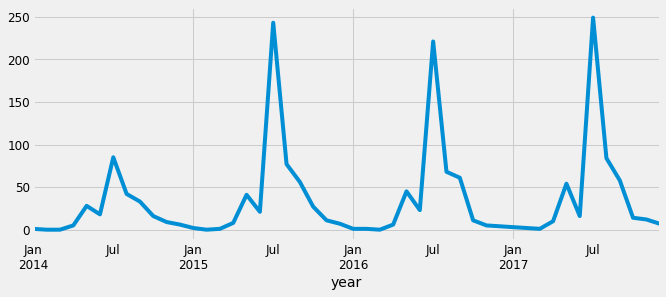

In [88]:
y.plot(figsize=(10, 4))
plt.show()

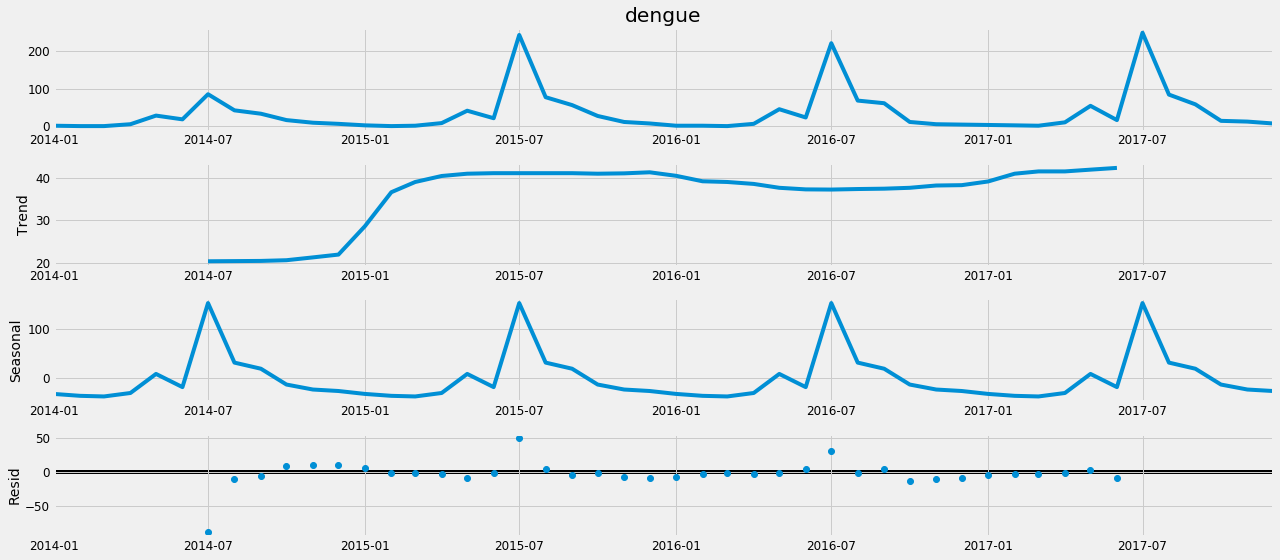

In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [91]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:532.336368495749
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1386.6020778226318
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:336.77742347394445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:166.87024598613047
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:344.53600719439777
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1324.114991487993
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:169.74405741356148
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:165.21129280014836
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:518.1734481026696
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3155.9923506752816
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:328.46512798593693
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:162.53697638550346
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:344.94050472128293
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3151.932011288593
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:171.65598941434382
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:161.58052361364628
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:526.7238358604294
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1537.163471147713

In [92]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1081      0.291     -0.372      0.710      -0.678       0.462
ma.L1         -0.9209      0.258     -3.576      0.000      -1.426      -0.416
ar.S.L12      -0.2427      0.027     -9.033      0.000      -0.295      -0.190
ma.S.L12       1.0000      0.365      2.743      0.006       0.285       1.715
sigma2        35.9240      0.010   3539.988      0.000      35.904      35.944


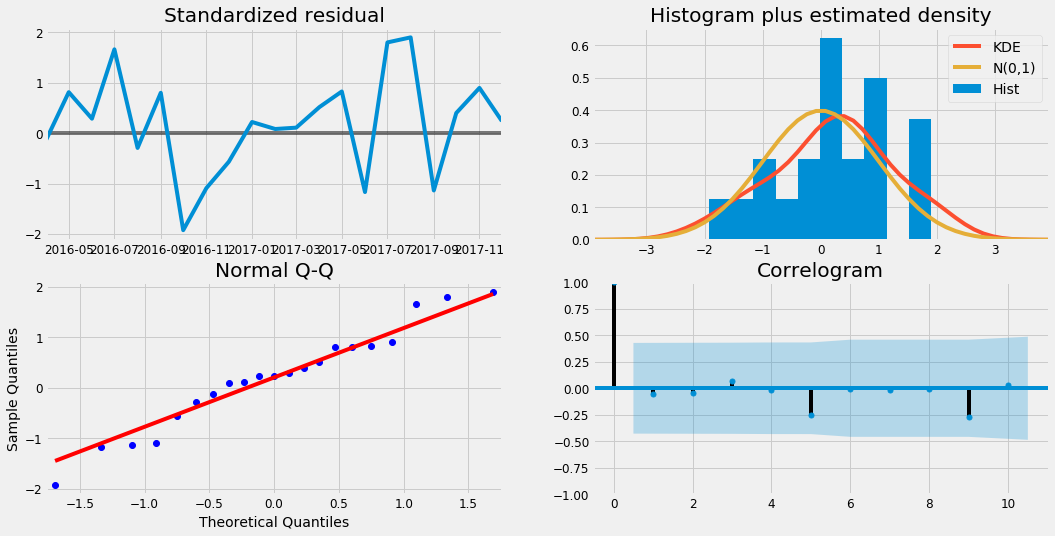

In [93]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

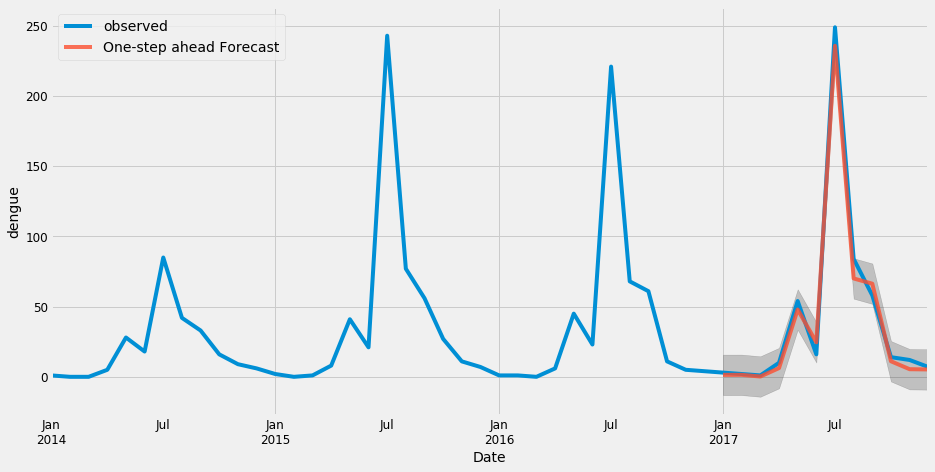

In [94]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('dengue')
plt.legend()
plt.show()

In [95]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 51.72


In [96]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 7.19


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 42.86 of the real sales. Our dengue range from around 0 to over 200. In my opinion, this is a pretty good model so far.

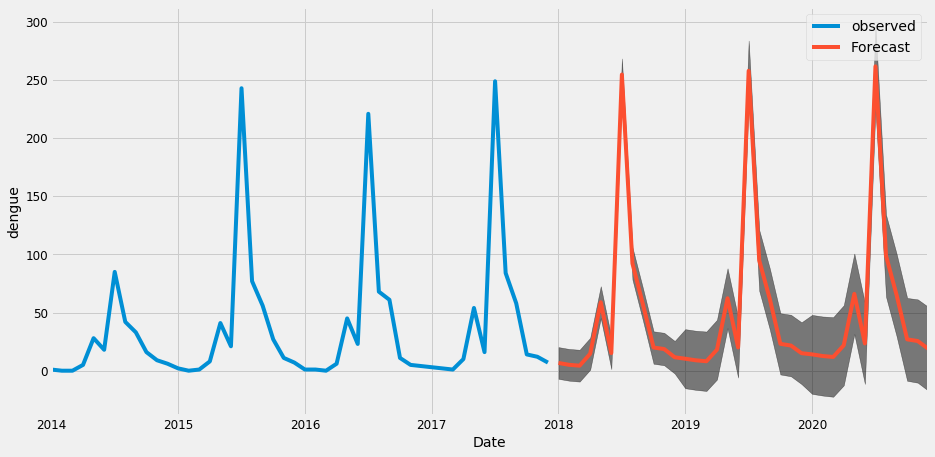

In [97]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('dengue')
plt.legend()
plt.show()

In [98]:
print(pred_ci.head(10))

            lower dengue  upper dengue
2018-01-01     -6.988099     20.293552
2018-02-01     -8.568890     18.715610
2018-03-01     -9.362464     18.010518
2018-04-01      0.884816     28.324029
2018-05-01     45.148300     72.655982
2018-06-01      1.396303     28.972029
2018-07-01    240.964321    268.607951
2018-08-01     78.410021    106.121387
2018-09-01     42.923202     70.702128
2018-10-01      6.021045     33.867470


In [99]:
dengue_series=pred_uc.predicted_mean
print(dengue_series.head(12))

2018-01-01      6.652727
2018-02-01      5.073360
2018-03-01      4.324027
2018-04-01     14.604423
2018-05-01     58.902141
2018-06-01     15.184166
2018-07-01    254.786136
2018-08-01     92.265704
2018-09-01     56.812665
2018-10-01     19.944257
2018-11-01     18.637652
2018-12-01     11.563883
Freq: MS, dtype: float64


In [100]:
dengue_nparray=dengue_series.to_numpy()

In [101]:
dengue_nparray[dengue_nparray<0] = 0
new_arr1 = np.ceil(dengue_nparray)
new_arr1

array([  7.,   6.,   5.,  15.,  59.,  16., 255.,  93.,  57.,  20.,  19.,
        12.,  11.,   9.,   9.,  19.,  63.,  21., 259.,  95.,  62.,  24.,
        22.,  16.,  15.,  13.,  12.,  22.,  67.,  24., 262.,  99.,  66.,
        27.,  26.,  19.])

In [102]:
sarima_df = pd.DataFrame()
sarima_df['year']=dengue_series.index
sarima_df['dengue']=new_arr1

In [103]:
sarima_df

,year,dengue
0,2018-01-01,7.0
1,2018-02-01,6.0
2,2018-03-01,5.0
3,2018-04-01,15.0
4,2018-05-01,59.0
5,2018-06-01,16.0
6,2018-07-01,255.0
7,2018-08-01,93.0
8,2018-09-01,57.0
9,2018-10-01,20.0


## Leptospirosis

In [104]:
y1 = z['Leptospirosis'].resample('MS').mean()

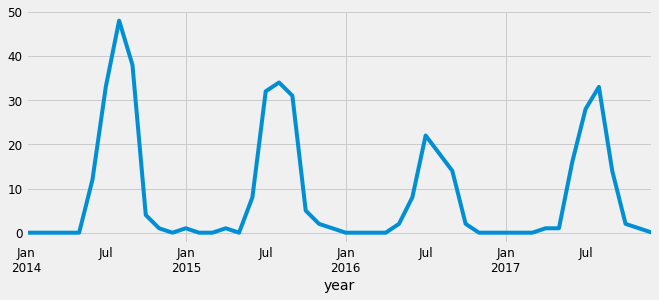

In [105]:
y1.plot(figsize=(10, 4))
plt.show()

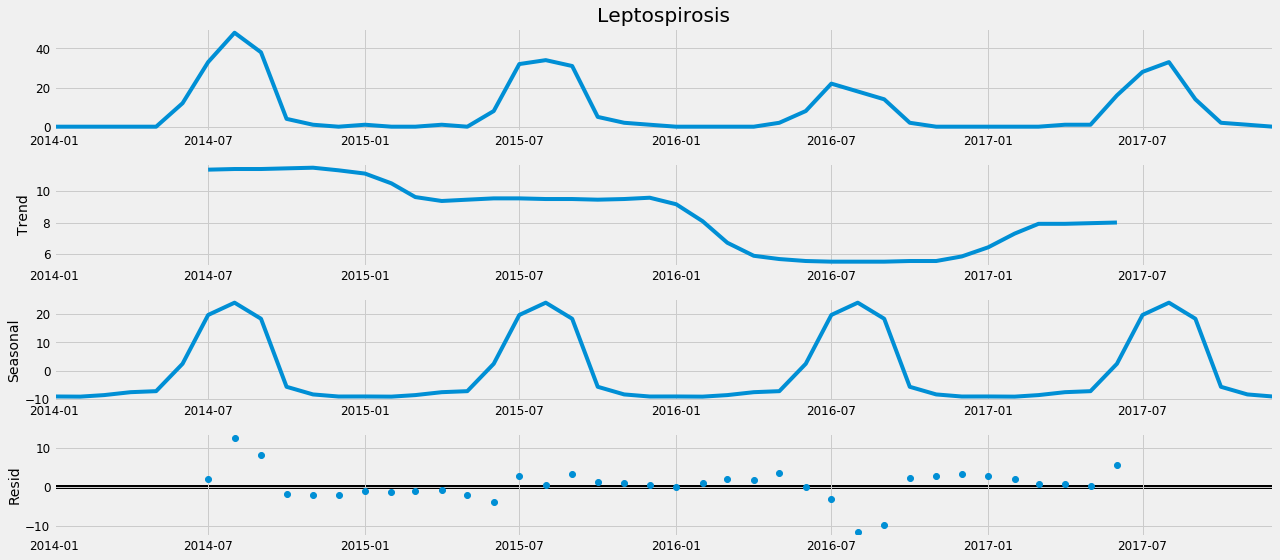

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

In [107]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [108]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:394.4589247962863
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1701.3690745451665
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:226.721071365989
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:155.75959965988105
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:219.82191873155884
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1327.420635869885
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:161.41176553263819
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:157.75947524012503
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:352.87063131000355
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1476.19103208682
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:213.42633090306728
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:144.49721157297108
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:213.09063557578543
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1241.7520807615629
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:155.6971863661738
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:144.03746421753618
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:345.7398785204746
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1111.9080154450849


In [109]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6862      0.653      1.051      0.293      -0.594       1.966
ma.L1         -1.0000   2665.260     -0.000      1.000   -5224.814    5222.814
ma.S.L12       0.4894      0.483      1.014      0.311      -0.457       1.436
sigma2        26.6342    7.1e+04      0.000      1.000   -1.39e+05    1.39e+05


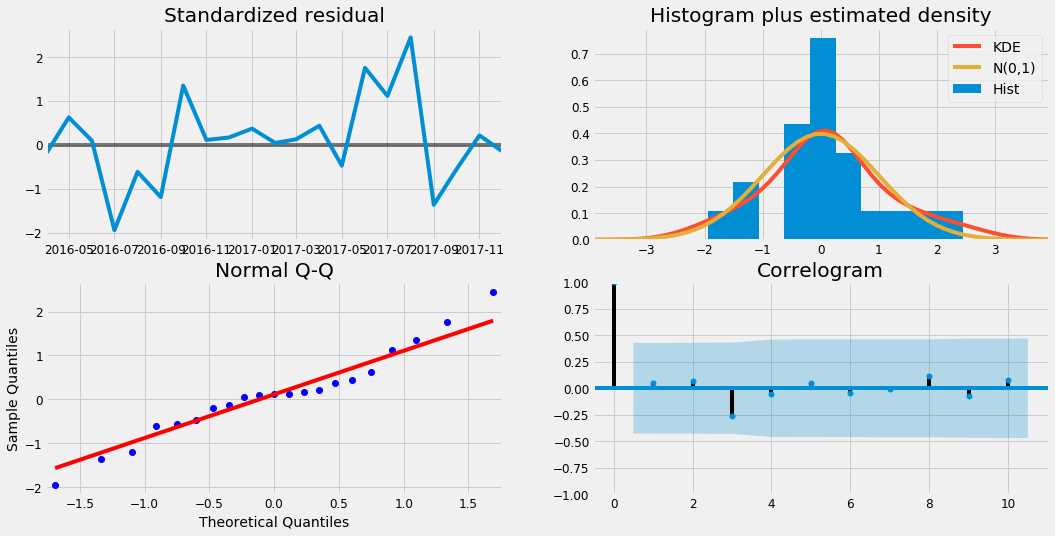

In [111]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

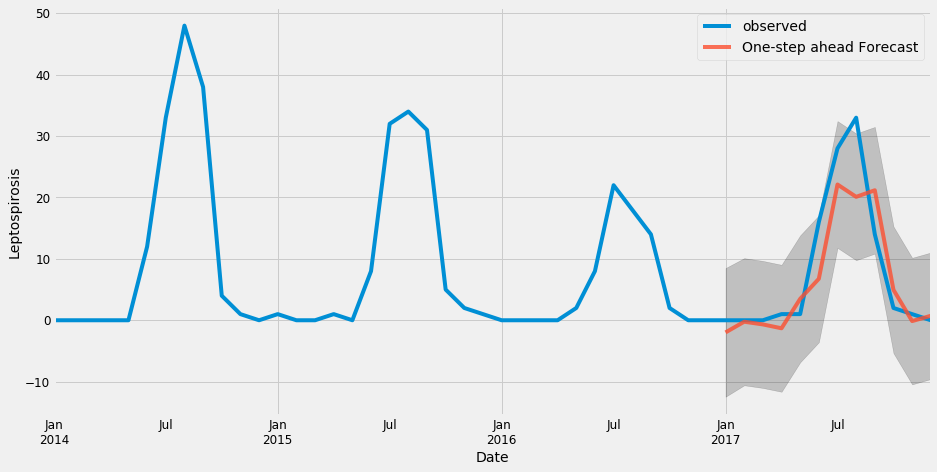

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y1['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Leptospirosis')
plt.legend()
plt.show()

In [114]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4998.28


In [115]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 70.7


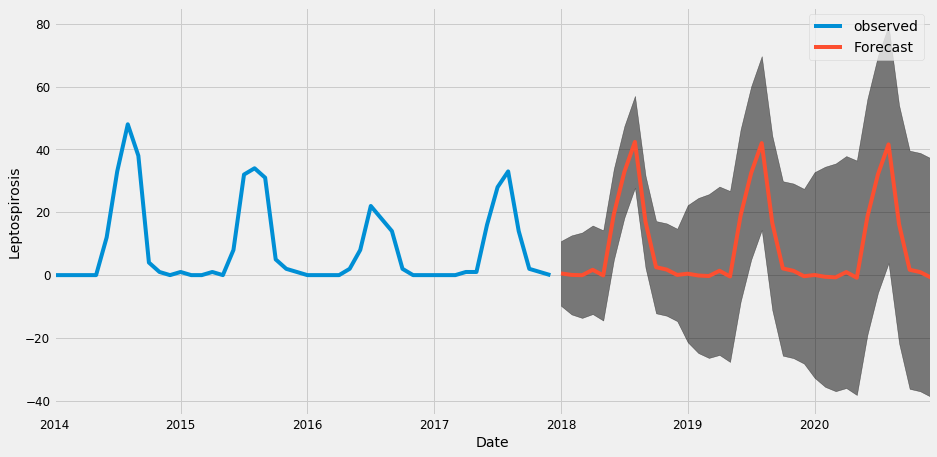

In [116]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Leptospirosis')
plt.legend()
plt.show()

In [117]:
print(pred_ci.head(12))

            lower Leptospirosis  upper Leptospirosis
2018-01-01            -9.760533            10.840352
2018-02-01           -12.505812            12.644782
2018-03-01           -13.625193            13.552178
2018-04-01           -12.398628            15.780604
2018-05-01           -14.448892            14.256026
2018-06-01             4.826014            33.820030
2018-07-01            18.284576            47.444340
2018-08-01            27.773956            57.032373
2018-09-01             2.321116            31.640202
2018-10-01           -12.161367            17.196065
2018-11-01           -12.921217            16.460986
2018-12-01           -14.643715            14.754762


In [118]:
leptospirosis_series=pred_uc.predicted_mean
print(leptospirosis_series.head(12))

2018-01-01     0.539910
2018-02-01     0.069485
2018-03-01    -0.036507
2018-04-01     1.690988
2018-05-01    -0.096433
2018-06-01    19.323022
2018-07-01    32.864458
2018-08-01    42.403164
2018-09-01    16.980659
2018-10-01     2.517349
2018-11-01     1.769884
2018-12-01     0.055524
Freq: MS, dtype: float64


In [119]:
leptospirosis_nparray=leptospirosis_series.to_numpy()

In [120]:
leptospirosis_nparray[leptospirosis_nparray<0] = 0
new_arr2 = np.ceil(leptospirosis_nparray)
new_arr2

array([ 1.,  1.,  0.,  2.,  0., 20., 33., 43., 17.,  3.,  2.,  1.,  1.,
        0.,  0.,  2.,  0., 19., 33., 43., 17.,  3.,  2.,  0.,  1.,  0.,
        0.,  1.,  0., 19., 33., 42., 17.,  2.,  1.,  0.])

In [121]:
sarima_df['leptospirosis']=new_arr2

In [122]:
sarima_df

,year,dengue,leptospirosis
0,2018-01-01,7.0,1.0
1,2018-02-01,6.0,1.0
2,2018-03-01,5.0,0.0
3,2018-04-01,15.0,2.0
4,2018-05-01,59.0,0.0
5,2018-06-01,16.0,20.0
6,2018-07-01,255.0,33.0
7,2018-08-01,93.0,43.0
8,2018-09-01,57.0,17.0
9,2018-10-01,20.0,3.0


### FINAL PREDICTION TABLE

In [125]:
final_table=sarima_df.iloc[12:, :]

In [126]:
final_table

,year,dengue,leptospirosis
12,2019-01-01,11.0,1.0
13,2019-02-01,9.0,0.0
14,2019-03-01,9.0,0.0
15,2019-04-01,19.0,2.0
16,2019-05-01,63.0,0.0
17,2019-06-01,21.0,19.0
18,2019-07-01,259.0,33.0
19,2019-08-01,95.0,43.0
20,2019-09-01,62.0,17.0
21,2019-10-01,24.0,3.0
